# Import the needed libraries

In [62]:
#general imports that we will need will almost always use - it is a good practice to import all libraries at the beginning of the notebook or script
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)



# Import data

In [63]:
# path to folder
base_path = r"/Users/miguelcaramelo/Desktop/Data_Science/1_semestre/Machine_Learning/Project/Machine-Learning-project/project_data"
train_path = os.path.join(base_path, "train.csv")
test_path = os.path.join(base_path, "test.csv")
df_train = pd.read_csv(train_path, delimiter=',', header=0, decimal='.', quotechar='"')
df_test = pd.read_csv(test_path, delimiter=',', header=0, decimal='.', quotechar='"')

# Explore the data

Checking the first rows of the dataset df_train

In [64]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


Hcecking the last rows of the dataset df_train

In [65]:
df_train.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


Using the method .shape to check dataset dimensions

In [66]:
df_train.shape

(75973, 14)

Using the method .info(), to check the data types and to see if there are any missing values

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


Retiramos que existem Nan's em diversas colunas

Using the carID as index

In [68]:
df_train.set_index('carID', inplace = True)

Getting the main descriptive statistics for all variables using the method .describe()

In [69]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8
engineSize,74457.0,NaN,NaN,NaN,1.660136,0.573462,-0.103493,1.2,1.6,2.0,6.6


Counting the number of NaN's by column

In [70]:
df_train.isna().sum()

Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

Counting the duplicates

In [71]:
print(f"O Dataset df_train tem {df_train.duplicated().sum()} linhas duplicadas.")

O Dataset df_train tem 4 linhas duplicadas.


Creating two features lists, one with the metric features and the other with the non metric features

In [72]:
non_metric_features=["Brand", "model", "year", "fuelType", "hasDamage", "transmission"]
metric_features=df_train.columns.drop(non_metric_features + ["price"]).tolist()

## Numerical Variables 

### Histograms

Text(0.5, 0.98, "Numeric Variables' Histograms")

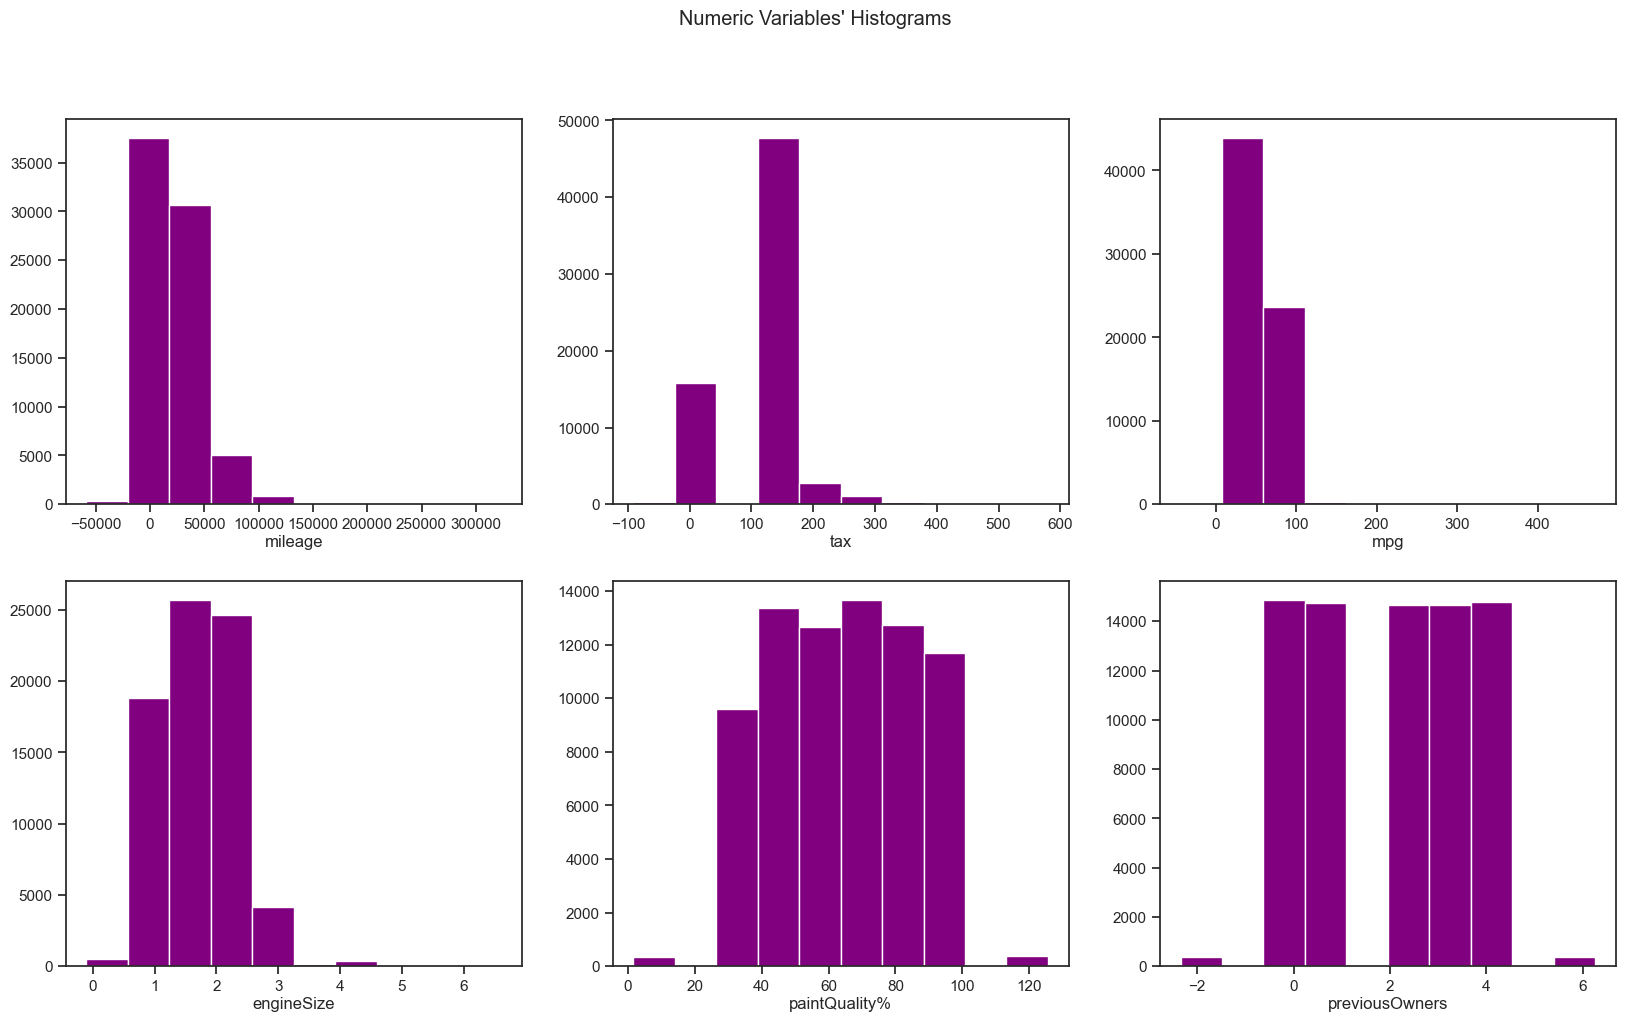

In [73]:
sp_rows = 2
sp_cols = 3


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

### Boxplots

Text(0.5, 0.98, 'BoxPlots')

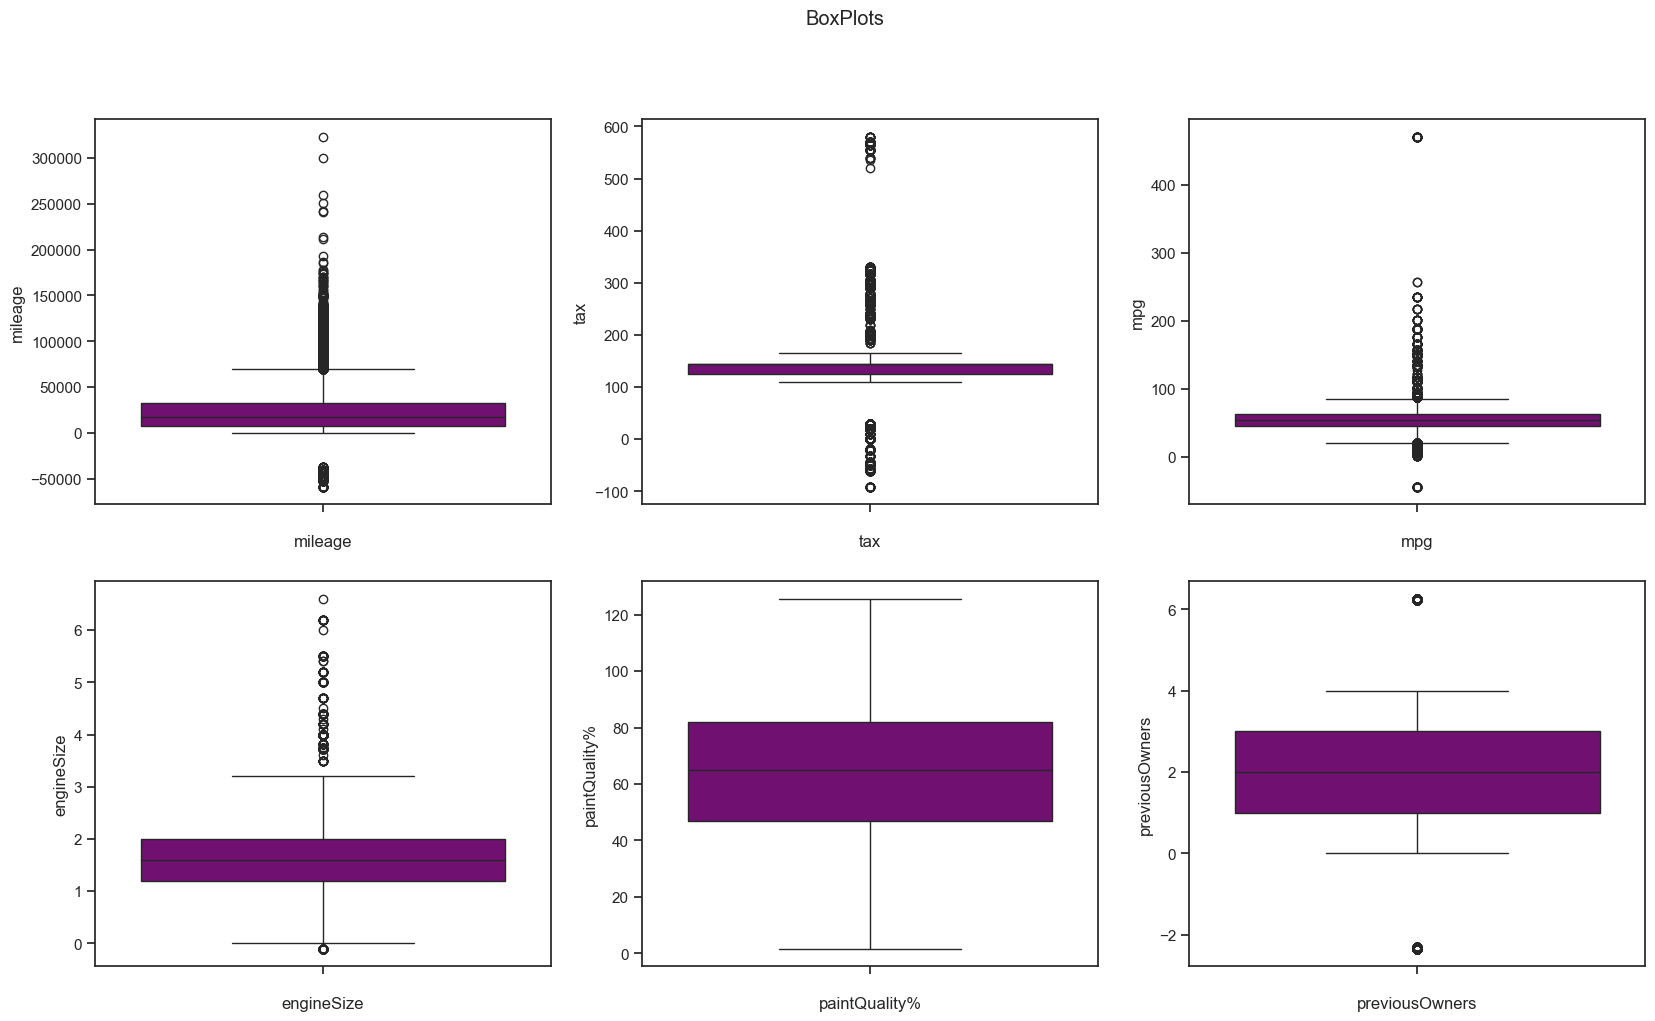

In [74]:
#Boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")

## Target Variable

### Histogram

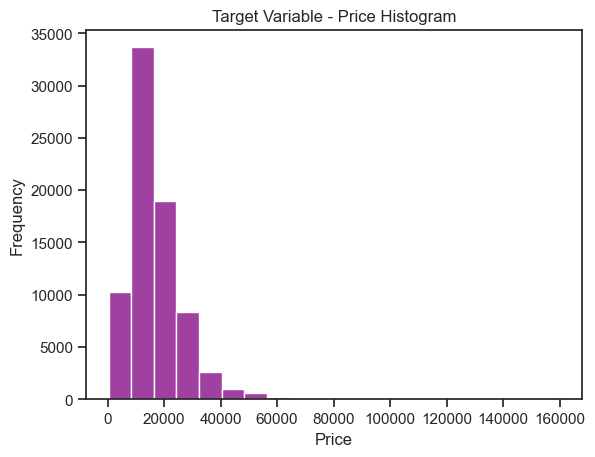

In [75]:
sns.histplot(df_train["price"], bins=20, color=("purple"))
plt.title("Target Variable - Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show() 

### Boxplot

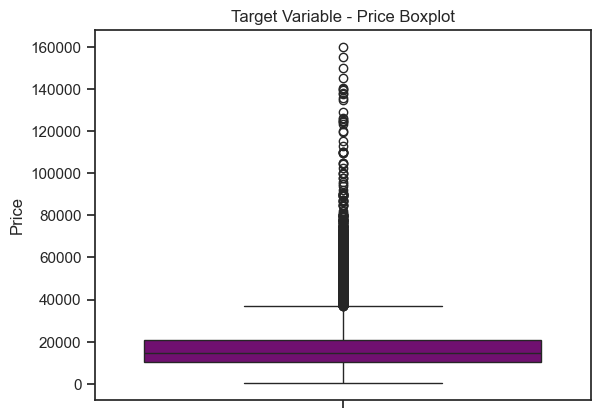

In [76]:
sns.boxplot(y=df_train["price"], color=("purple"))
plt.title("Target Variable - Price Boxplot")
plt.ylabel("Price")
plt.show()

Através da Análise de todos os Boxplots e Histogramas acima conseguimos detetar a presença de Outliers. Mais à frente iremos decidir o que fazer.

### Corr of Numeric and Target Variables 

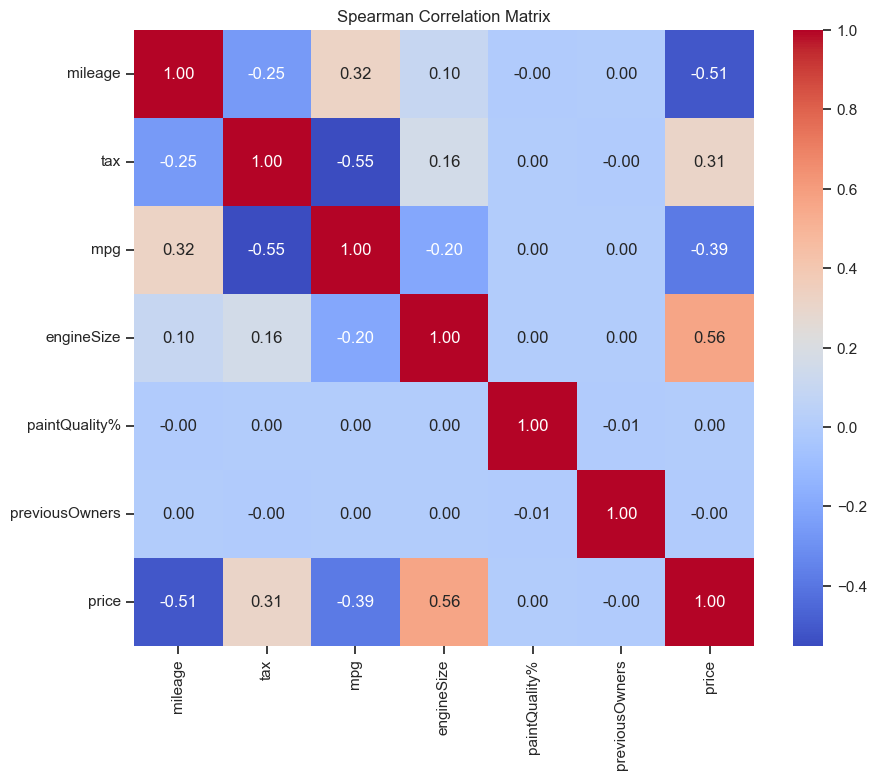

In [77]:
corr = df_train[metric_features + ["price"]].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()


## Categorical Variables

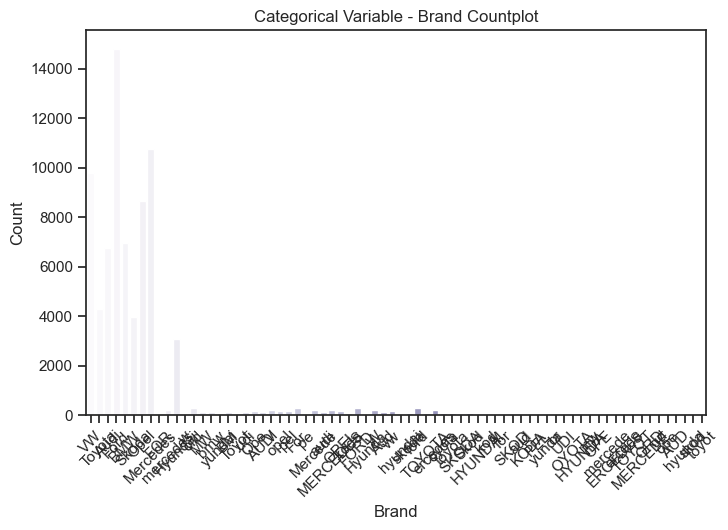

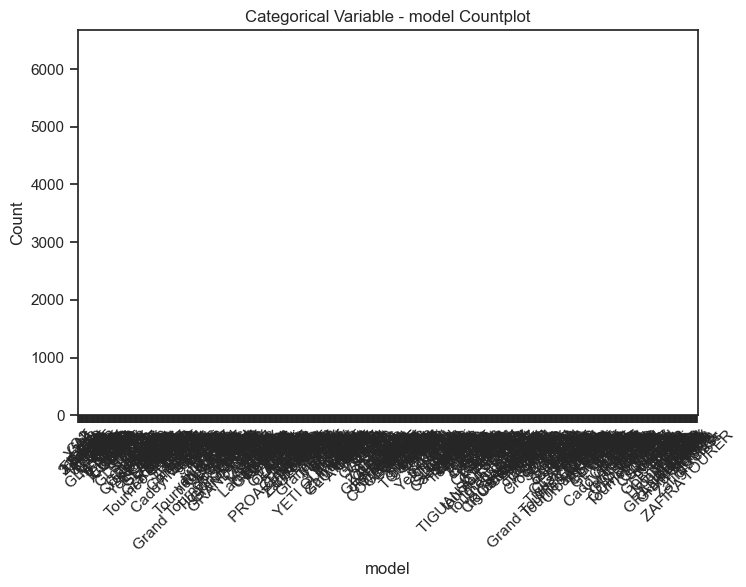

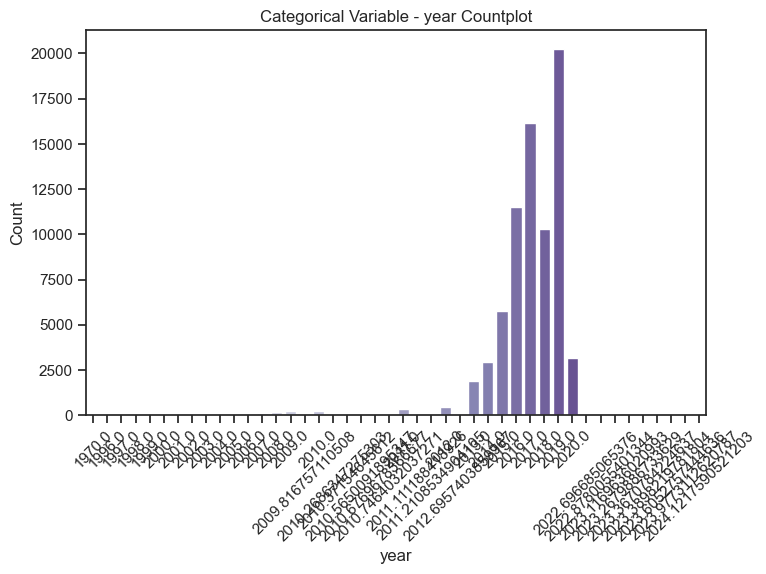

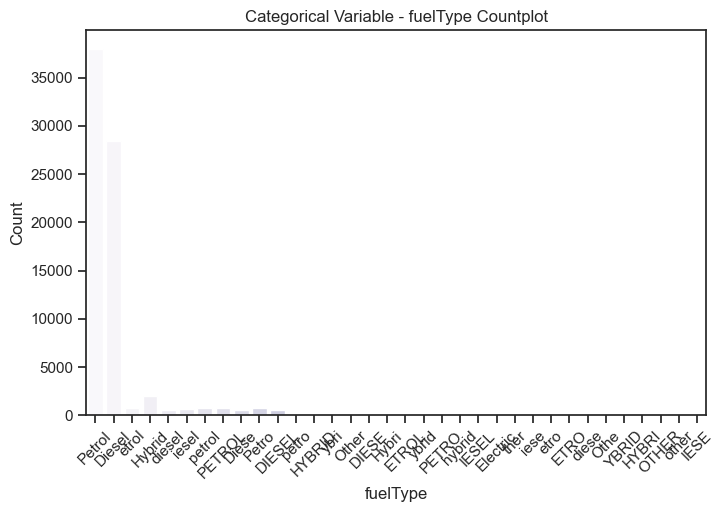

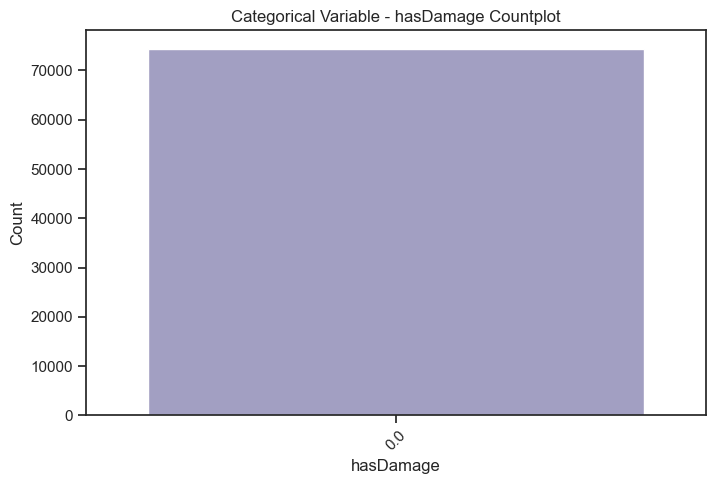

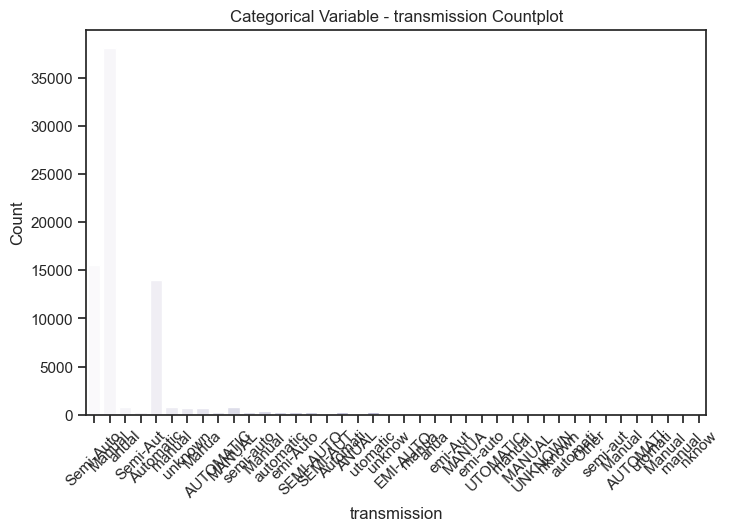

In [78]:

for feature in non_metric_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_train, x=feature, palette="Purples")
    plt.title(f"Categorical Variable - {feature} Countplot")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

Pela a análises dos dados do output a cima, chegamos à conclusao de que existem typos e então teremos que limpar o dataset.

# Modify the data

## Cleaning the typos in the columns

Verificar se os typos do test sao os mesmos que no training para todas as colunas

### Typos column Brand

In [79]:
print(f"Brand: {df_train['Brand'].unique()}")

Brand: ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']


In [80]:
set(set(df_test['Brand'])-set(df_train['Brand']))

{'M', 'YUNDAI', 'bm', 'oyot'}

In [81]:
list_bmw = ["BMW", "MW", "bmw", "BM", "mw", "bm", "M"]
list_audi = ["Audi", "udi", "AUDI", "audi", "Aud", "aud", "UDI", "ud", "AUD"]
list_mercedes = ["Mercedes", "mercedes", "Mercede", "MERCEDES", "ercedes", "mercede", "ERCEDES", "ercede", "MERCEDE"]
list_ford = ["Ford", "FOR", "For", "FORD", "ford", "for", "or", "ORD", "ord"]
list_toyota = ["Toyota", "Toyot", "TOYOTA", "oyota", "toyota", "OYOTA", "TOYOT", "toyot", "oyot"]
list_opel = ["Opel", "Ope", "opel", "pel", "pe", "OPEL", "PEL", "OPE", "ope"]
list_skoda = ["Skoda", "koda", "skoda", "SKODA", "Skod", "kod", "SKOD", "KODA", "skod"]
list_hyundai = ["Hyundai", "yundai", "Hyunda", "hyundai", "HYUNDAI", "yunda", "HYUNDA", "YUNDA", "yunda", "hyunda", "YUNDAI"]
list_vw = ["VW", "V", "v","vw", "w", "W"]

def clean_brand(brand):
   if brand in list_bmw:
      return "BMW"
   elif brand in list_audi:
      return "Audi"
   elif brand in list_mercedes:
      return "Mercedes"
   elif brand in list_ford:
      return "Ford"
   elif brand in list_toyota:
      return "Toyota"
   elif brand in list_opel:
      return "Opel"
   elif brand in list_skoda:
      return "Skoda"
   elif brand in list_hyundai:
      return "Hyundai"
   elif brand in list_vw:
      return "VW"
   else:
      return brand
   
df_train['Brand'] = df_train['Brand'].apply(clean_brand)


#df_train[df_train["Brand"].isna()]
#for i in non_metric_features:
   #print(df_train[i].unique())
#hasDamage é a variável constante, em principio não faz sentido mantê-la

### Typos fuelType column

In [82]:
print(f"fuelType: {df_train['fuelType'].unique()}")

fuelType: ['Petrol' 'Diesel' 'etrol' 'Hybrid' 'diesel' 'iesel' nan 'petrol' 'PETROL'
 'Diese' 'Petro' 'DIESEL' 'petro' 'HYBRID' 'ybri' 'Other' 'DIESE' 'Hybri'
 'ETROL' 'ybrid' 'PETRO' 'hybrid' 'IESEL' 'Electric' 'ther' 'iese' 'etro'
 'ETRO' 'diese' 'Othe' 'YBRID' 'HYBRI' 'OTHER' 'other' 'IESE']


In [83]:
set(set(df_test['fuelType'])-set(df_train['fuelType']))

{'hybri'}

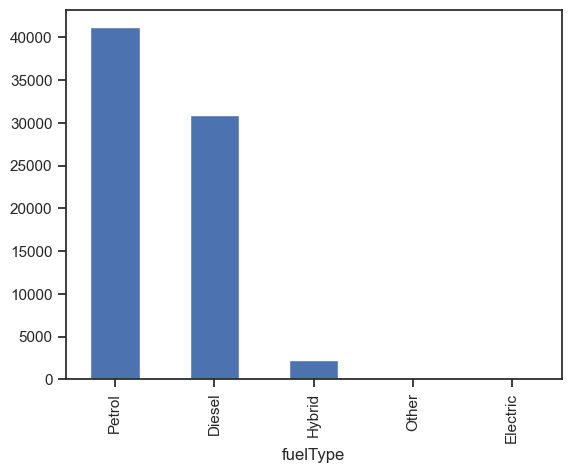

In [84]:
diesel_types=["DIESEL","Diese","diesel","iesel","IESEL","DIESE","iese","diese","IESE"]
petrol_types=["petrol","Petro","etrol", "PETROL","petro","etro","ETROL","PETRO","ETRO"]
hybrid_types=["HYBRID", "hybrid","Hybri","ybrid","HYBRI","ybri","YBRID", "hybri"]
other=["ther","Othe","OTHER","other"]
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Diesel" if i in diesel_types else i)
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Petrol" if i in petrol_types else i)
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Hybrid" if i in hybrid_types else i)
df_train["fuelType"]=df_train["fuelType"].apply(lambda i: "Other" if i in other else i)
df_train["fuelType"].value_counts().plot(kind="bar")

df_train.loc[df_train["fuelType"].isin(["nan"]), "fuelType"] = np.nan

### Typos model column

In [85]:
print(f"model: {df_train['model'].unique()}")

model: [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris' ' sharan' ' I20' ' Adam' ' X3' ' A8'
 ' GLS Class' ' B-MAX' ' A4' ' Kona' ' I10' ' A1' ' Mokka' ' fiesta'
 ' S-MAX' ' X2' ' Crossland X' ' Tiguan' ' A5' ' GLE Class' ' C CLASS'
 ' mokka x' ' Zafira' ' Ioniq' ' A6' ' Mondeo' ' Yeti Outdoor' ' X1'
 'POLO' ' INSIGNIA' ' Scala' ' S Class' ' 1 Series' ' Kamiq' ' Kuga'
 ' Tourneo Connect' ' Q7' ' GLA Class' ' Arteon' ' polo' ' SL CLASS'
 'Tucson' ' Santa Fe' ' Grandland X' ' I800' ' ASTRA' ' RAV4' ' c class'
 ' Touran' ' Citigo' ' Focu' ' Roomster' ' Prius' ' Corolla' ' Fiest'
 ' B Class' 

In [88]:
set(set(df_test['model'])-set(df_train['model']))

{' 5 SERIE',
 ' AGILA',
 ' Amica',
 ' CLA Clas',
 ' Californi',
 ' Camr',
 ' G CLAS',
 ' GL Clas',
 ' HILU',
 ' I4',
 ' M CLAS',
 ' OCTAVI',
 ' PASSA',
 ' POL',
 ' Pum',
 ' R Class',
 ' RS7',
 ' SHARA',
 ' SHUTTLE',
 ' Transit Tourneo',
 ' Veloster',
 ' YETI',
 ' ZAFIR',
 ' antara',
 ' c-h',
 ' fiest',
 ' fox',
 ' fusion',
 ' jetta',
 ' land cruiser',
 ' m5',
 ' octavi',
 ' proace verso',
 ' tigua',
 ' x4',
 ' yeti outdoo',
 ' zafira tourer',
 '180',
 '2 series',
 'A',
 'C CLASS',
 'CITIGO',
 'Camry',
 'Caravelle',
 'Edge',
 'GOLF',
 'Grand Tourneo Connect',
 'I2',
 'I8',
 'I800',
 'Jetta',
 'Kamiq',
 'PASSAT',
 'PROACE VERSO',
 'Pum',
 'Q',
 'RS4',
 'SQ5',
 'Tiguan Allspace',
 'VERSO',
 'X-CLASS',
 'YARIS',
 'a5',
 'i8',
 'viva'}

In [91]:
car_models = {
    "GOLF": ['Golf', 'Gol', ' GOLF', ' golf', ' golf s', ' Gol', ' Golf SV', ' golf sv', 'Golf', 'golf', ' GOLF', ' Golf S', ' gol', ' GOL', ' Golf'],
    "POLO": ['POL', 'Polo', 'Pol', 'polo', ' POLO', ' polo', ' Pol', ' Polo', 'POLO'],
    "PASSAT": ['passa', 'Passat', ' PASSAT', ' Passa', ' passa', ' Passa', ' Passa', ' passat', ' Passat'],
    "TIGUAN": ['Tiguan', ' Tiguan', ' TIGUAN', 'Tigua', ' tiguan', ' Tigua', ' TIGUA', ' tiguan', ' Tiguan', 'TIGUAN', 'tiguan', 'tigua'],
    "TIGUAN_ALLSPACE": [' tiguan allspace', ' Tiguan Allspac', 'Tiguan Allspace', ' TIGUAN ALLSPACE', ' Tiguan Allspace'],
    "TOUAREG": ['Touareg', ' TOUAREG', ' touareg', ' Touare', ' Touareg'],
    "T_ROC": ['T-Roc', ' T-Ro', ' t roc', ' T-Roc'],
    "T_CROSS": ['T-Cross', ' T-CROSS', ' t-cros', ' t cross', ' T-Cros', ' T-RO', ' T-ROC', ' t-roc', ' t-cross', 'T-Cross', ' T-Cross'],
    "ARTEON": ['Arteon', ' arteon', ' Arteo', ' ARTEON', ' Arteon'],
    "SHARAN": ['SHARA', 'Sharan', ' sharan', ' SHARAN', ' Shara', ' Sharan', ' Sharan'],
    "JETTA": ['Jetta', ' Jetta', ' JETTA', 'jetta'],
    "CC": ['CC', ' cc', ' CC'],
    "CARAVELLE": ['Caravelle', ' caravelle', ' Caravell', ' Caravelle'],
    "CALIFORNIA": ['Californi', 'California', ' California'],
    "CADDY": ['Caddy', ' Caddy'],
    "CADDY_MAXI": ['Caddy Maxi Life', ' Caddy Maxi Lif', ' Caddy Maxi', ' Caddy Maxi Life', ' Caddy Life'],
    "TOURAN": ['Touran', ' touran', ' TOURAN', ' Touran', 'Toura', ' TOURA', ' Toura'],
    "GOLF_SV": ['Golf SV', 'Golf S', ' golf sv', ' GOLF SV', 'Golf SV'],
    "BEETLE": ['Beetle', ' beetle', ' Beetl', ' Beetle'],
    "SCIROCCO": ['Scirocco', ' scirocco', ' Scirocc', ' SCIROCCO', ' Scirocco'],
    "UP": ['Up', ' up', ' UP', ' Up', ' U', 'U', 'UP'],
    "AMAROK": ['Amarok', ' Amarok', ' amarok', ' Amaro'],
    "EOS": ['Eos', ' Eos'],
    "FOX": ['Fox', ' Fox', 'fox'], 
    "FOCUS": ['Focus', 'FOCUS', ' focus', ' FOCUS', ' FOCU', ' Focu', ' focu', ' Focus', 'Focu', 'focus'],
    "FIESTA": ['fiest', 'Fiesta', ' FIESTA', ' Fiest', 'fiesta', ' fiesta', ' Fiest', ' FIEST', ' fiest', ' Fiesta', 'Fiest'],
    "MONDEO": ['Mondeo', ' MONDEO', ' mondeo', ' Monde', ' MONDE', ' Mondeo'],
    "KUGA": ['Kuga', ' KUGA', ' kuga', ' Kug', ' kuga', ' Kuga', 'kuga'],
    "GALAXY": ['Galaxy', ' GALAXY', ' Galax', ' galax', ' Galaxy', ' galaxy'],
    "S_MAX": ['S-MAX', ' s-max', ' S-MA', ' s-ma', ' S-MAX'],
    "B_MAX": ['B-MAX', ' B-MA', ' b-max', ' B-MA', ' B-MAX', 'B-MA'],
    "ECOSPORT": ['EcoSport', ' ecosport', ' ECOSPORT', ' EcoSpor', ' EcoSport'],
    "PUMA": ['Pum', 'Puma', ' puma', ' PUMA', ' Puma'],
    "TOURNEO_CUSTOM": ['Tourneo Custom', ' tourneo custom', ' Tourneo Custo', ' Tourneo Custom', 'Transit Tourneo'],
    "TOURNEO_CONNECT": ['Tourneo Connect', ' Grand Tourneo Connect', ' tourneo connect', ' Tourneo Connect'],
    "KA": ['Ka', ' KA', ' ka', ' Ka'],
    "KA_PLUS": [' Ka+', ' ka+', ' KA+', 'Ka+', 'ka+'],
    "C_MAX": ['C-MAX', ' C-MAX', ' c-max', ' C-MA'],
    "GRAND_C_MAX": ['Grand C-MAX', ' Grand C-MAX', ' GRAND C-MAX', ' Grand C-MA', ' grand c-max'],
    "EDGE": ['Edge', ' edge', ' EDGE', ' Edge', ' Edg'],
    "MUSTANG": ['Mustang', ' mustang', ' Mustang'],
    "GRAND_TOURNEO_CONNECT": [' Grand Tourneo Connec'],
    "FUSION": ['Fusion', ' Fusion', 'fusion'],
    "STREETKA": ['Streeka', ' Streetka'],
    "RANGER": ['Ranger', ' Ranger'],
    "ESCORT": ['Escort', ' Escort'], "CORSA": ['Corsa', 'corsa', ' corsa', ' Cors', ' CORSA', ' cors', ' CORS', ' Corsa'],
    "ASTRA": ['Astra', 'ASTRA', 'astra', ' astra', ' ASTRA', ' ASTRA', ' Astr', 'Astra', ' Astra'],
    "INSIGNIA": ['Insignia', 'Insigni', ' INSIGNIA', ' insignia', ' Insigni', ' INSIGNI', ' Insignia'],
    "MOKKA": ['Mokka', 'Mokk', ' MOKKA', ' Mokka X', ' mokka', ' mokka x', ' MOKKA X', ' Mokk', ' Mokk', ' Mokka ', ' mokka ', ' Mokka X', ' Mokka', 'Mokka X', 'Mokka '],
    "ZAFIRA": ['ZAFIR', 'Zafira', ' zafira', ' ZAFIRA', ' Zafir', ' Zafira Tourer', ' Zafira Toure', ' ZAFIRA TOURER', 'Zafira Tourer', ' Zafira', 'Zafir', 'zafira tourer'],
    "VIVA": ['Viva', ' viva', ' VIVA', ' Viva', ' Viv', ' Viva'],
    "MERIVA": ['Meriva', ' meriva', ' MERIVA', ' Meriv', ' Meriva'],
    "ADAM": ['Adam', ' adam', ' Ada', ' ADAM', ' Adam'],
    "COMBO_LIFE": ['Combo Life', 'COMBO LIFE', ' combo life', ' COMBO LIFE', ' Combo Lif', ' Combo Life'],
    "CROSSLAND_X": ['Crossland X', ' CROSSLAND X', ' crossland x', ' Crossland ', ' CrosslandX', ' Crossland X'],
    "GRANDLAND_X": ['Grandland X', ' Grandland X', ' grandland x', ' GRANDLAND X', ' Grandland ', ' grandland ', ' Grandland X'],
    "GTC": ['GTC', ' gtc', ' GTC', 'gtc'],
    "ANTARA": ['antara', 'Antara', ' Antara'],
    "VIVARO": ['Vivaro', ' Vivaro'],
    "VECTRA": ['Vectra', ' Vectra', ' VECTRA'],
    "AGILA": ['AGILA', 'Agila', ' Agila'],
    "TIGRA": ['Tigra', ' Tigra'],
    "CASCADA": ['Cascada', ' Cascada'],
    "AMPERA": ['Ampera', ' Ampera'], 
    "SERIES_1": ['1 Series', '1 series', '1 SERIES', ' 1 Series', ' 1 SERIES', ' 1 serie', ' 1 Serie', ' 1 SERIE', ' 1 series'],
    "SERIES_2": ['2 Series', '2 Serie', ' 2 Series', ' 2 SERIES', ' 2 Serie', ' 2 serie', ' 2 series'],
    "SERIES_3": ['3 Series', '3 Serie', ' 3 Series', ' 3 SERIES', ' 3 Serie', ' 3 serie', ' 3 series'],
    "SERIES_4": ['4 Series', ' 4 serie', '4 series', ' 4 Series', ' 4 SERIES', ' 4 Serie', ' 4 series'],
    "SERIES_5": ['5 SERIE','5 Series', '5 SERIES', ' 5 Series', ' 5 SERIES', ' 5 Serie', ' 5 series'],
    "SERIES_6": ['6 Series', ' 6 Series', ' 6 SERIES', ' 6 Serie', ' 6 series'],
    "SERIES_7": ['7 Series', ' 7 Series', ' 7 SERIES', ' 7 Serie', ' 7 series'],
    "SERIES_8": ['8 Series', ' 8 SERIES', '8 SERIES', ' 8 Serie', ' 8 Series', ' 8 series'],
    "X1": ['X1', ' x1', ' X1', 'x1'],
    "X2": ['X2', ' IX2', ' x2', ' X2'],
    "X3": ['X3', ' x3', ' X3'],
    "X4": ['X4', ' x4', ' X4'],
    "X5": ['X5', ' x5', ' X5'],
    "X6": ['X6', ' x6', ' X6'],
    "X7": ['X7', ' x7', ' X7'],
    "Z3": ['Z3', ' Z3'],
    "Z4": ['Z4', ' z4', ' Z4'],
    "M2": ['M2', ' M2'],
    "M3": ['M3', ' m3', ' M3'],
    "M4": ['M4', ' m4', ' M4'],
    "M5": ['M5', ' M5', 'm5'],
    "M6": ['M6', ' M6'], "A1": ['A1', ' a1', ' A1'],
    "A2": ['A2', ' A2'],
    "A3": ['A3', ' a3', ' A 3', ' A3', ' a3'],
    "A4": ['A4', ' a4', ' A4', ' a4'],
    "A5": ['A5', ' a5', ' A5'],
    "A6": ['A6', ' A6', ' a6'],
    "A7": ['A7', ' a7', ' A7'],
    "A8": ['A8', ' A8', 'a8'],
    "Q2": ['Q2', ' q2', ' Q2'],
    "Q3": ['Q3', ' q3', ' Q3'],
    "Q5": ['Q5', ' q5', ' Q5', ' q5', 'q5'],
    "Q7": ['Q7', ' q7', ' Q7'],
    "Q8": ['Q8', ' q8', ' Q8'],
    "S3": ['S3', ' s3', ' S3'],
    "S4": ['S4', ' S4'],
    "S5": ['S5', ' S5'],
    "S8": ['S8', ' S8'],
    "RS3": ['RS3', ' RS3'],
    "RS4": ['RS4', ' RS4'],
    "RS5": ['RS5', ' RS5'],
    "RS6": ['RS6', ' RS6'],
    "SQ5": ['SQ5', ' SQ5'],
    "SQ7": ['SQ7', ' SQ7', ' sq7'],
    "TT": ['TT', ' TT', ' tt', ' T'],
    "R8": ['R8', ' r8', ' R8'],  
    "A_CLASS": ['A-Class', 'a class', 'A CLASS', ' A-Class', ' a class', ' A CLASS', 'A Clas', ' a clas', 'A-Class', ' A Class', 'A CLASS', 'A Clas', ' a class', ' A Class', 'A CLASS', ' A Clas', ' a class', 'A Class'],
    "B_CLASS": ['B-Class', 'b class', 'B CLASS', ' b class', ' B Clas', ' B Class', ' B CLASS', ' b class', 'B Class'],
    "C_CLASS": ['C-Class', 'C Clas', 'C CLASS', 'c class', ' c class', ' C Class', ' C Clas', ' c clas', ' C Class', 'C CLASS', ' c class', ' C CLAS', ' C CLASS', 'C Class'],
    "E_CLASS": ['E-Class', 'E CLASS', ' E Clas', ' e class', 'E Class', 'E-Class', ' E Class', 'E CLASS', ' e class', ' E Class', 'E CLASS', ' e class', ' E CLASS', 'e class'],
    "S_CLASS": ['S-Class', 'S Class', 'S CLASS', ' s class', ' S Clas', ' S Class', 'S CLASS', ' S CLASS'],
    "CLA_CLASS": ['CLA Clas', 'CLA-Class', ' CLA CLASS', 'CLA CLASS', 'CLA Class', ' cla class', ' CLA Class', ' CLA Class'],
    "CLS_CLASS": ['CLS-Class', 'CLS Class', 'CLS CLASS', ' cls class', ' CL Class', ' cl class', ' CL CLASS', ' CL Clas', ' CLS Class', ' CLS CLASS', ' CLS Clas'],
    "GLA_CLASS": ['GLA-Class', ' GLA CLASS', 'GLA CLASS', ' gla class', ' GLA Class', ' GLA Clas', 'GLA Class'],
    "GLB_CLASS": ['GLB-Class', ' glb class', 'GLB Class', ' GLB Class'],
    "GLC_CLASS": ['GLC-Class', 'GLC CLASS', ' glc class', ' GLC Class', ' glc clas', ' GLC Class', ' GLC CLASS', ' GLC Clas', 'GLC Class'],
    "GLE_CLASS": ['GLE-Class', ' GLE CLASS', 'GLE CLASS', 'GLE Class', ' gle class', ' GLE Clas', ' GLE Class', 'GLE CLASS'],
    "GLS_CLASS": ['GLS-Class', 'GLS CLASS', ' GLS Class', ' GLS CLASS', ' GLS Clas', ' gls class'],
    "GL_CLASS": ['GL Clas', 'GL-Class', 'GL Class', ' GL Class', ' GL CLASS', ' gl class'],
    "G_CLASS": ['G CLAS','G-Class', ' G Class'],
    "V_CLASS": ['V-Class', 'V CLASS', ' v class', ' V Clas', ' V Class', ' V CLASS', 'V Class'],
    "X_CLASS": ['X-Class', ' x-class', ' x-clas', ' X Clas', ' X-CLASS', ' X-CLAS'],
    "SL_CLASS": ['SL-Class', ' SL CLASS', 'SL CLASS', ' sl class', ' SL CLAS', ' SL CLASS', ' SL'],
    "SLK_CLASS": ['SLK-Class', 'SLK', ' slk', ' SLK'],
    "M_CLASS": ['M CLAS', 'M-Class', ' M CLASS', ' m class', 'M Class', ' M Class', ' M Clas'],
    "CLK": ['CLK', ' CLK'],
    "CL_CLASS": ['CL Class'],
    "CLC_CLASS": ['CLC Class', ' CLC Class'],
    "MERCEDES200": ['200', ' 200'],
    "MERCEDES230": ['230', ' 230'],
    "MERCEDES220": ['220', ' 220'],   
    "YARIS": ['Yaris', 'yaris', ' yaris', 'Yari', ' YARIS', ' Yari', ' Yaris', ' yari', ' Yari', ' YARI'],
    "AYGO": ['Aygo', ' AYGO', ' aygo', 'aygo', ' Ayg', ' AYG', ' ayg', ' Aygo'],
    "COROLLA": ['Corolla', ' COROLLA', ' corolla', ' Coroll', ' Corolla', 'corolla'],
    "C_HR": ['c-h', 'C-HR', ' c-hr', ' C-HR', ' C-H'],
    "AVENSIS": ['Avensis', ' AVENSIS', ' avensis', ' Avensis'],
    "PRIUS": ['Prius', ' PRIUS', ' prius', ' Prius'],
    "RAV4": ['RAV4', ' RAV', ' rav', ' rav4', ' RAV4', 'rav4', 'RAV'],
    "HILUX": ['HILO', 'Hilux', ' hilux', ' Hilu', ' Hilux'],
    "VERSO": ['Verso', ' verso', ' VERSO', ' Verso-S', ' Vers', ' Verso'],
    "SUPRA": ['Supra', ' Supra', 'Supra'],
    "LAND_CRUISER": ['Land Cruiser', ' Land Cruise', ' Land Cruiser', 'land cruiser'],
    "CAMRY": ['Camr', 'Camry', ' Camry'],
    "PROACE_VERSO": ['Proace Verso', ' PROACE VERSO', 'proace verso'],
    "URBAN_CRUISER": ['Urban Cruiser', ' Urban Cruiser', ' Urban Cruise'],
    "AURIS": ['Auris', ' auris', ' AURI', ' AURIS', ' Auri', ' Auris'],
    "GT86": [' GT86', 'GT86', ' gt86'], "I10": ['i10', ' i10', 'I10', ' I1', ' I10', ' I1'],
    "I20": ['i20', 'I20', ' I20', ' i20', ' I2'],
    "I30": ['i30', ' i30', 'I30', ' I30', 'I3', ' i3', 'i3', ' I3'],
    "I40": ['I4', 'i40', 'I40', ' i40', ' I40', ' I40'],
    "I800": ['i800', ' I80', 'I800', ' i800', ' I800', 'i8', ' I8', ' i8'],
    "IONIQ": ['Ioniq', ' ioniq', ' IONIQ', ' Ioni', ' Ioniq', ' IQ', 'IONIQ'],
    "KONA": ['Kona', ' KONA', ' kona', ' KON', ' Kona', ' Kon'],
    "TUCSON": ['Tucson', 'Tucso', ' tucson', ' Tucso', ' TUCSON', ' TUCSO', ' Tucso', ' TUCSO', ' TUCSON', ' Tucson'],
    "SANTA_FE": ['Santa Fe', ' santa fe', ' Santa Fe', ' SANTA FE', ' Santa F'],
    "GETZ": ['Getz', ' Getz'],
    "IX20": ['ix20', 'IX20', ' IX20', ' ix20'],
    "IX35": ['ix35', ' IX35', 'IX35', ' ix35'],
    "VELOSTER": ['Veloster', 'Veloste', ' Veloste'],
    "ACCENT": ['Accent', ' Accent'],
    "TERRACAN": ['Terracan', ' Terracan'],  "FABIA": ['Fabia', ' FABIA', ' fabia', ' Fabi', ' Fabia', 'FABIA'],
    "OCTAVIA": ['OCTAVI', 'Octavia', ' OCTAVIA', ' octavia', 'octavia', 'Octavi', ' octavia', ' Octavi', ' Octavia', 'octavi'],
    "SUPERB": ['Superb', ' superb', ' SUPERB', ' super', ' Super', ' Superb'],
    "KAROQ": ['Karoq', ' karoq', ' Karo', ' KAROQ', ' Karoq'],
    "KODIAQ": ['Kodiaq', 'kodiaq', ' kodiaq', ' KODIAQ', ' Kodia', ' Kodiaq'],
    "KAMIQ": ['Kamiq', ' KAMIQ', ' kamik', ' kamiq', ' KAMI', ' Kamiq'],
    "YETI": ['YETI', 'Yeti', ' yeti', ' Yeti Outdoo', ' yeti outdoor', 'yeti outdoo', ' Yeti Outdoor', 'Yeti Outdoor', ' YETI OUTDOOR', ' Yet', ' Yeti'],
    "SCALA": ['Scala', ' scala', ' Scal', ' SCALA', ' scal', ' Scala'],
    "RAPID": ['Rapid', ' rapid', ' Rapi', ' Rapi', ' Rapid'],
    "CITIGO": ['Citigo', ' citigo', ' CITIGO', ' Citig', ' Citigo'],
    "ROOMSTER": ['Roomster', ' Roomste', ' Roomster'],  
    "LEON": ['Leon'],
    "ATECA": ['Ateca'],
    "TOLEDO": ['Toledo'],
    "ARONA": ['Arona'],
    "IBIZA": ['Ibiza'],
    "ALHAMBRA": ['Alhambra'], 
    "SHUTTLE": ['SHUTTLE', 'Shuttle', ' Shuttle', ' shuttle'],
    "KADJAR": ['Kadjar', ' Kadjar']
}


for model, typos in car_models.items():
    df_train['model'] = df_train['model'].apply(lambda x: model if x in typos else x )
    df_test['model'] = df_test['model'].apply(lambda x: model if x in typos else x )
set(set(df_test['model'])-set(df_train['model']))

{' 5 SERIE',
 ' AGILA',
 ' Amica',
 ' CLA Clas',
 ' Californi',
 ' Camr',
 ' G CLAS',
 ' GL Clas',
 ' HILU',
 ' I4',
 ' M CLAS',
 ' OCTAVI',
 ' PASSA',
 ' POL',
 ' Pum',
 ' R Class',
 ' RS7',
 ' SHARA',
 ' SHUTTLE',
 ' Transit Tourneo',
 ' Veloster',
 ' YETI',
 ' ZAFIR',
 ' antara',
 ' c-h',
 ' fox',
 ' fusion',
 ' jetta',
 ' land cruiser',
 ' m5',
 ' octavi',
 ' proace verso',
 ' tigua',
 ' yeti outdoo',
 ' zafira tourer',
 '180',
 '2 series',
 'A',
 'Grand Tourneo Connect',
 'I2',
 'I8',
 'PROACE VERSO',
 'Q',
 'X-CLASS',
 'a5',
 'viva'}

### Typos transmission column

In [ ]:
#typos in transmission
df_train["transmission"]=df_train["transmission"].apply(lambda i: "Semi-Auto" if i in ["Semi_Aut","Semi_Auto","Semi-Aut","SEMI-AUTO","EMI-AUTO","semi-auto","semi-aut","SEMI-AUT","emi-Auto","emi-Aut","emi-auto","Semi-aut"] else i)
df_train["transmission"]=df_train["transmission"].apply(lambda i: "Automatic" if i in ["AUTOMATIC","Automati","utomatic","UTOMATIC","automatic","AUTOMATI","automati","utomati"] else i)
df_train["transmission"]=df_train["transmission"].apply(lambda i: "Manual" if i in ['anual', 'manual', 'Manua', 'MANUAL', ' Manual ', 'ANUAL', 'unknow','manua', 'anua', 'MANUA', ' manual ', ' MANUAL ', ' Manual', 'Manual ', 'manual '] else i)

# Corrigir "nan" falsos
df_train.loc[df_train["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"]), "transmission"] = np.nan

# Ver resultado final
df_train["transmission"].unique()

NameError: name 'X_train' is not defined

### Correção do Ano

In [ ]:
df_train["year"]=df_train["year"].apply(lambda i: int(i) if isinstance(i,float) and not np.isnan(i) else i)

In [26]:
X = df_train.drop('price', axis = 1)
y = df_train['price']
y

carID
69512    22290
53000    13790
6366     24990
29021    12500
10062    22995
         ...  
37194    13498
6265     12495
54886     8399
860      12990
15795    10495
Name: price, Length: 75973, dtype: int64

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

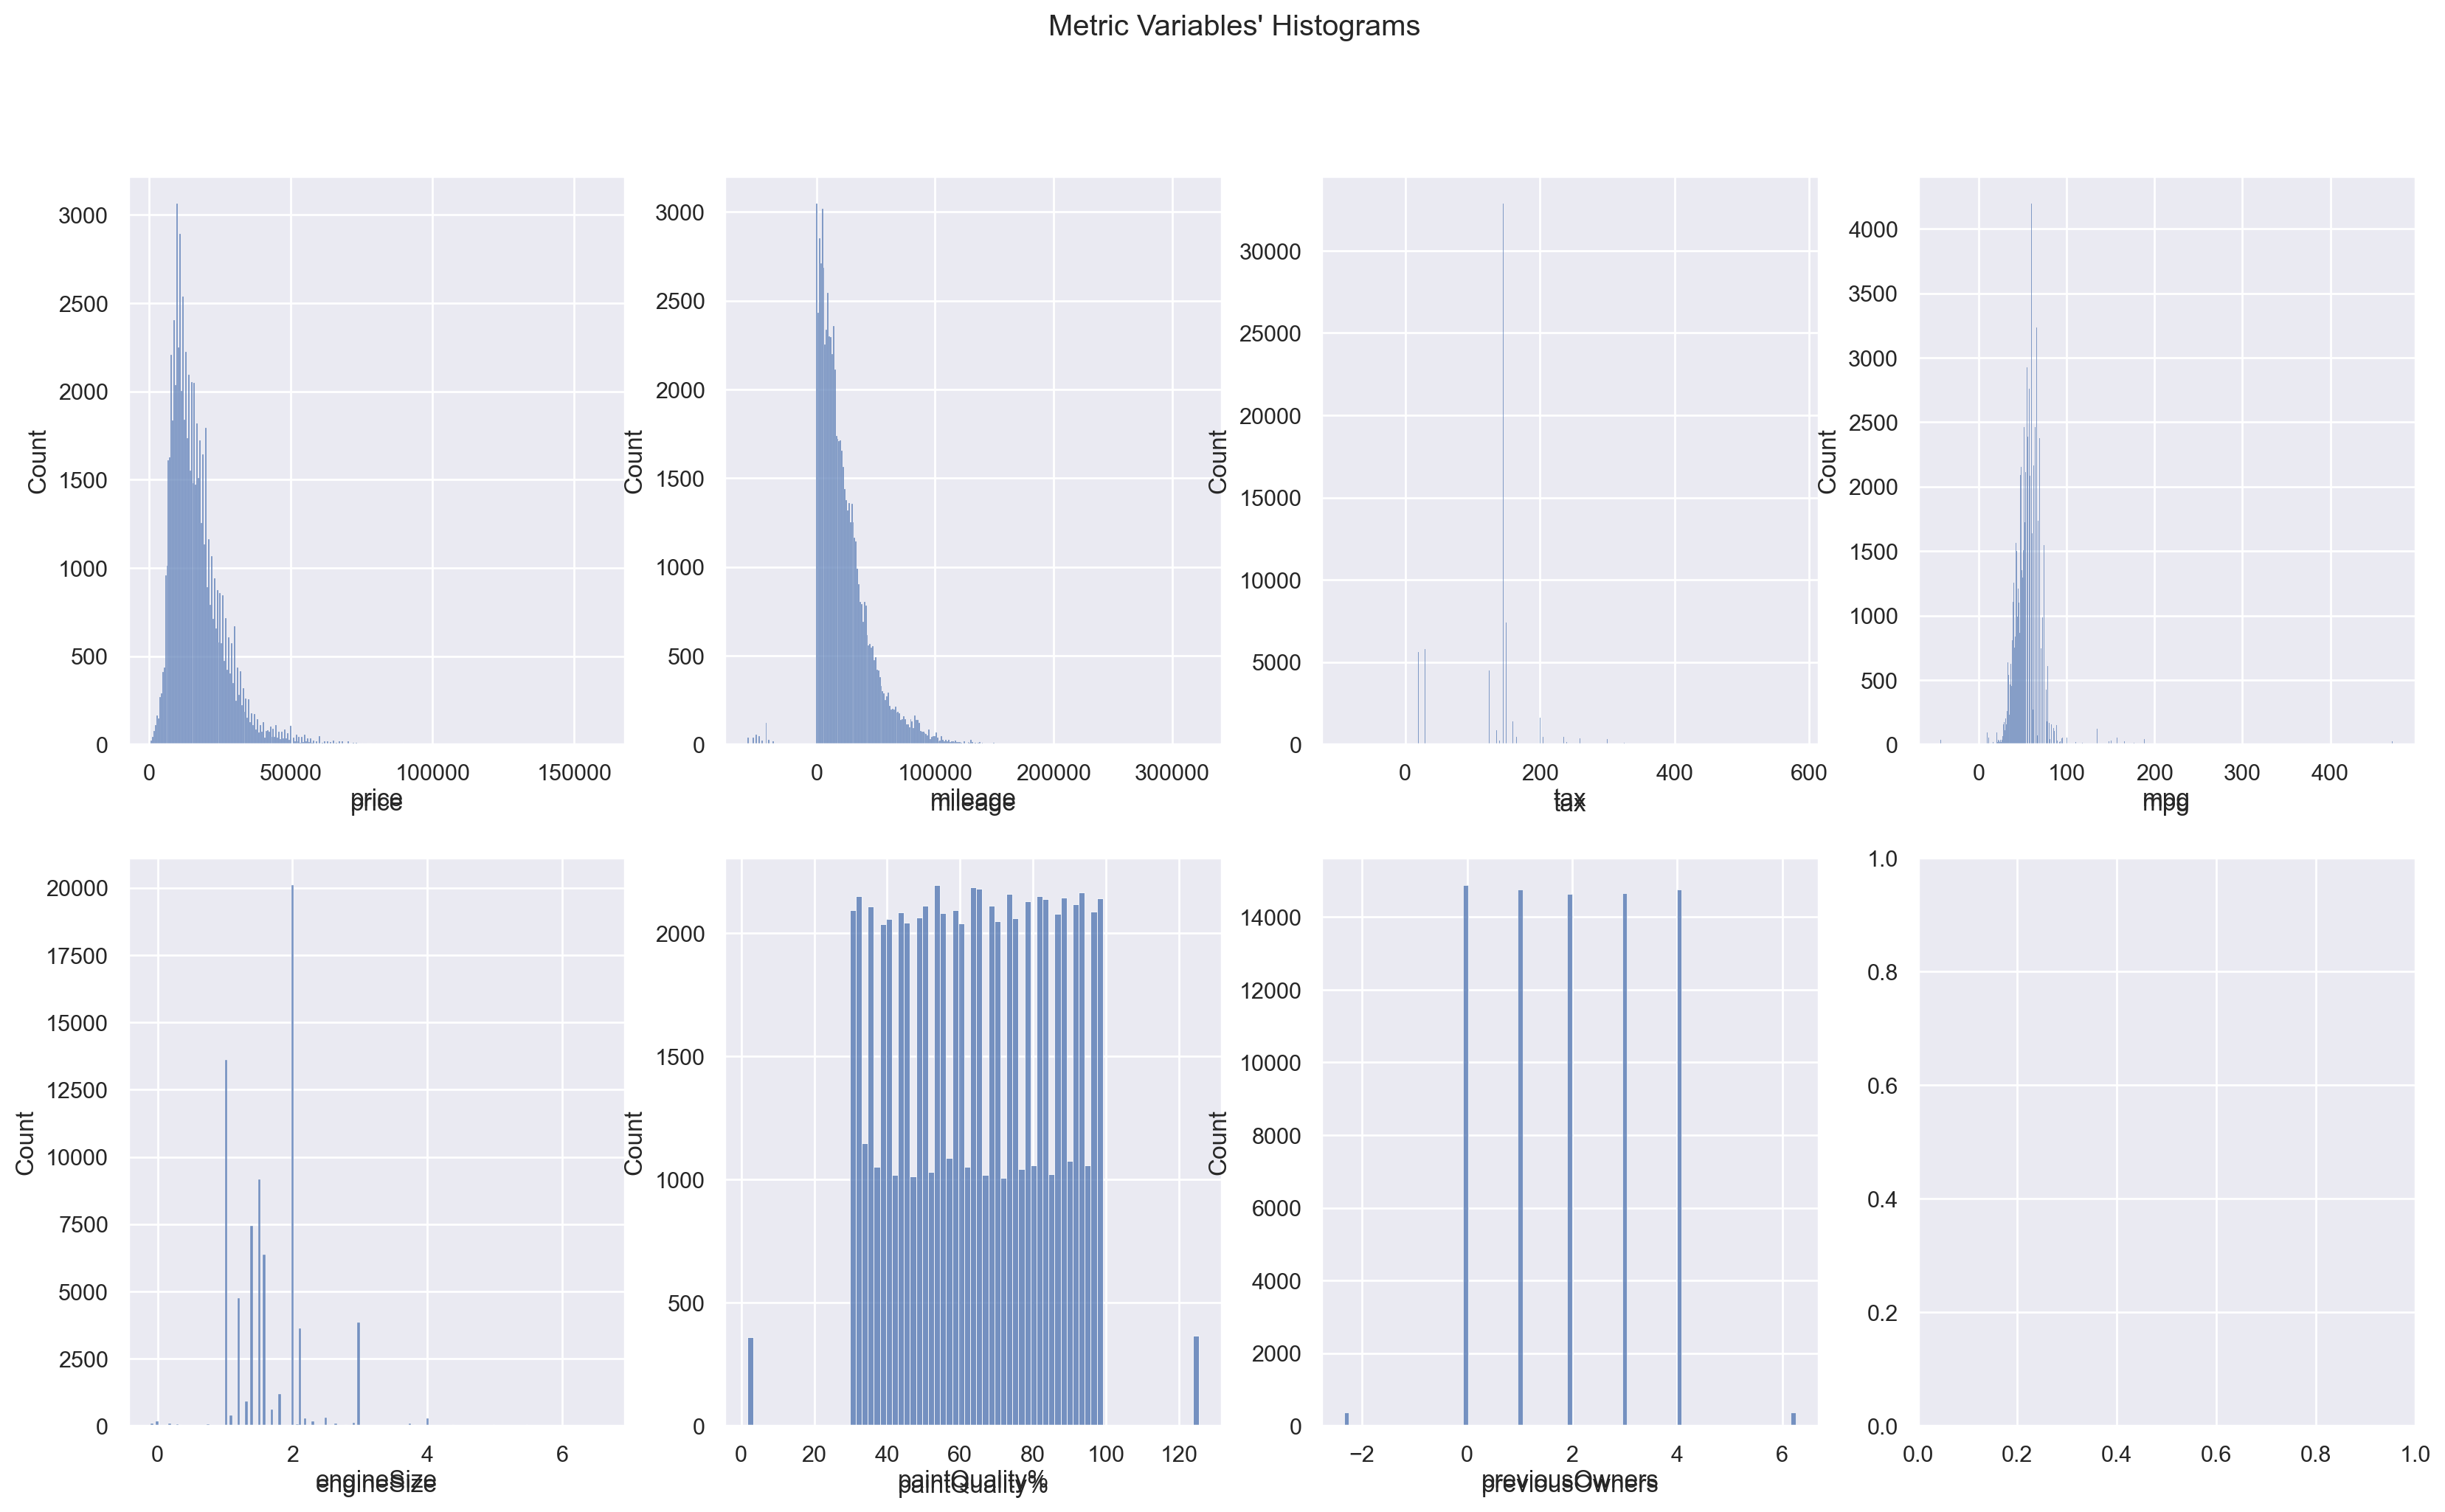

'\nfor i in metric_features:\n    plt.figure(figsize=(10,5))\n    sns.histplot(data=df_train, x=i)\n    plt.show()\n'

In [ ]:
non_metric_features=["Brand", "model", "year", "fuelType", "hasDamage", "transmission"]
metric_features=df_train.columns.drop(non_metric_features).tolist()
#print(metric_features)

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = 4


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(df_train[feat], ax=ax)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

#if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    #os.makedirs(os.path.join('..', 'figures', 'eda'))
    
#plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()
"""
for i in metric_features:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df_train, x=i)
    plt.show()
    smdcçwkjrepo
"""
